In [2]:
# 0. 사용할 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_validate, StratifiedKFold
from keras.layers.embeddings import Embedding
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.initializers import Initializer
from keras import regularizers
from keras.models import load_model

Using TensorFlow backend.


In [27]:
raw_data = pd.read_csv('./final_data.csv')

In [28]:
x_train, x_test, y_train, y_test = train_test_split(raw_data.iloc[:,0:501], raw_data.iloc[:,501],
                                                    test_size = 0.2, stratify = raw_data.iloc[:,501], random_state = 7)


In [29]:
for i in range(0, x_train.shape[0]):
    x_train.iloc[i,:] = (x_train.iloc[i,:] - min(x_train.iloc[i,:])) / (max(x_train.iloc[i,:]) - min(x_train.iloc[i,:]))
    
for i in range(0, x_test.shape[0]):
    x_test.iloc[i,:] = (x_test.iloc[i,:] - min(x_test.iloc[i,:])) / (max(x_test.iloc[i,:]) - min(x_test.iloc[i,:]))
    

In [30]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [31]:
x_train.shape

(68, 501)

In [32]:
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(68, 501, 1) (68,) (22, 501, 1) (22,)


In [18]:
# design network
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(501,1), kernel_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid', kernel_initializer = 'glorot_normal', kernel_regularizer = regularizers.l2(0.01)))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, mode='min')
model_check_point = ModelCheckpoint('./LSTM_Final_Model_CV.h5', monitor = 'val_loss', verbose =2, save_best_only=True)
callback_list = [early_stop,model_check_point]

# fit network
history = model.fit(x_train, y_train, epochs=200, batch_size=64, validation_split=0.2, verbose=2, shuffle=False,
                   callbacks = callback_list)

Train on 68 samples, validate on 22 samples
Epoch 1/200
 - 2s - loss: 3.2872 - acc: 0.4265 - val_loss: 3.2768 - val_acc: 0.2727

Epoch 00001: val_loss improved from inf to 3.27676, saving model to ./LSTM_Final_Model_CV.h5
Epoch 2/200
 - 1s - loss: 3.2762 - acc: 0.2941 - val_loss: 3.2665 - val_acc: 0.6364

Epoch 00002: val_loss improved from 3.27676 to 3.26654, saving model to ./LSTM_Final_Model_CV.h5
Epoch 3/200
 - 1s - loss: 3.2653 - acc: 0.6176 - val_loss: 3.2568 - val_acc: 0.6818

Epoch 00003: val_loss improved from 3.26654 to 3.25683, saving model to ./LSTM_Final_Model_CV.h5
Epoch 4/200
 - 1s - loss: 3.2552 - acc: 0.7647 - val_loss: 3.2469 - val_acc: 0.9091

Epoch 00004: val_loss improved from 3.25683 to 3.24689, saving model to ./LSTM_Final_Model_CV.h5
Epoch 5/200
 - 1s - loss: 3.2470 - acc: 0.8235 - val_loss: 3.2369 - val_acc: 0.9091

Epoch 00005: val_loss improved from 3.24689 to 3.23686, saving model to ./LSTM_Final_Model_CV.h5
Epoch 6/200
 - 1s - loss: 3.2359 - acc: 0.8235 - v

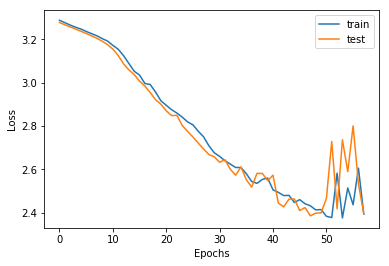

In [19]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
model = load_model('LSTM_Final_Model_CV.h5')

In [21]:
y_pred = model.predict_classes(x_val)

In [22]:
acc_score = accuracy_score(y_val, y_pred, normalize=True, sample_weight=None)
precision = precision_score(y_val, y_pred, pos_label=1)
recall = recall_score(y_val, y_pred, pos_label=1)
f_score = f1_score(y_val, y_pred, pos_label=1)
conf_mat = confusion_matrix(y_val, y_pred)

In [23]:
print(conf_mat)
print(acc_score)
print(precision)
print(recall)
print(f_score)

[[8 2]
 [0 8]]
0.8888888888888888
0.8
1.0
0.888888888888889


In [24]:
y_pred = model.predict_classes(x_test)

acc_score = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f_score = f1_score(y_test, y_pred, pos_label=1)
conf_mat = confusion_matrix(y_test, y_pred)

print(conf_mat)
print(acc_score)
print(precision)
print(recall)
print(f_score)

[[12  0]
 [ 0 10]]
1.0
1.0
1.0
1.0


In [55]:
for i in range(0, raw_data.shape[0]):
    raw_data.iloc[i,:-1] = (raw_data.iloc[i,:-1] - min(raw_data.iloc[i,:-1])) / (max(raw_data.iloc[i,:-1]) - min(raw_data.iloc[i,:-1]))

In [56]:
raw_data_X = np.array(raw_data.iloc[:,:-1])
raw_data_y = np.array(raw_data.iloc[:,501])

In [57]:
raw_data_X = raw_data_X.reshape((raw_data_X.shape[0], raw_data_X.shape[1], 1))

In [4]:
model = load_model('LSTM_Final_Model_2.h5')

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [86]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state = 500)
X = raw_data_X
Y = raw_data_y

cv_acc = []
cv_precision = []
cv_recall = []
cv_f1 = []

In [87]:
for train, test in kfold.split(X, Y):
    
    # evaluate the model
    y_pred = model.predict_classes(X[test])
    
    accuracy = accuracy_score(Y[test], y_pred, normalize=True, sample_weight=None)
    precision = precision_score(Y[test], y_pred, pos_label=1)
    recall = recall_score(Y[test], y_pred, pos_label=1)
    f_score = f1_score(Y[test], y_pred, pos_label=1)
    
    cv_acc.append(accuracy)
    cv_precision.append(precision)
    cv_recall.append(recall)
    cv_f1.append(f_score)

In [88]:
print('accuracy:', np.mean(cv_acc))
print('precision:', np.mean(cv_precision))
print('recall:', np.mean(cv_recall))
print('f1:', np.mean(cv_f1))
print('\n')

accuracy: 0.9619047619047618
precision: 0.9595959595959596
recall: 0.96
f1: 0.9588972431077695


